# Edge Detection

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from skimage import img_as_float, img_as_uint, img_as_int, img_as_ubyte
from skimage.transform import resize
from fastai.vision import *

In [2]:
path_lbl = '/storage/vocal_cords_and_rings_data/data/labels'
path_img = '/storage/vocal_cords_and_rings_data/data/images'

In [3]:
# cap = cv2.VideoCapture('/storage/vocal_cords_and_rings_data/nbs/stage-2-big-0614-rn50.avi')
# #Advance 30 frames
# for i in range (0,1):
#     ret, frame = cap.read()

In [4]:
def cvt(img):
    return img[:, :, ::-1]

(141, 188, 3)


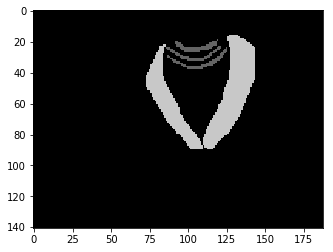

In [54]:
img_c = cv2.imread(str(get_image_files(path_img)[203]))
img = cv2.imread(str(get_image_files(path_lbl)[55]))
# img = resize(img, (500,500),anti_aliasing=True)

# fig=plt.figure(figsize=(8, 8))
# fig.add_subplot(1)

# plt.imshow(img*100)
# blur_img = cv2.blur(img, (3,3))
# plt.subplot(1,1)
plt.imshow(img*100)

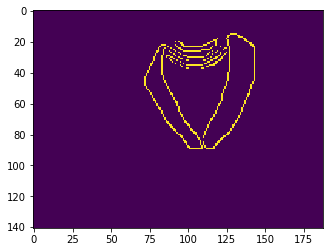

In [6]:
edges = cv2.Canny(img, 1,1)
plt.imshow(edges)

# Blob (Instance) Detection

In [3]:
from skimage import measure
from skimage import filters
import matplotlib.pyplot as plt
import numpy as np
from skimage import img_as_float, img_as_uint, img_as_int, img_as_ubyte
from scipy import ndimage

In [4]:
num_classes = 4 #everything_else, vocal_cords, tracheal_rings, bifurcation

In [5]:
def get_blobs(img, imshow=False):
    img2 = img_as_ubyte(np.array(img))
    print(img2.shape)

    #each channel in sep_classes contains a given class of labels. sep_blobs[i].shape is (img.width,img.height,num_classes)
    sep_classes = []
    for i in range (0,num_classes):
        sep_classes.append( np.array(img2 == i ).astype(np.uint) )
        
    print("stuff in [2] {}".format(np.unique(sep_classes[1])))

    blobs_labels = [measure.label(blobs, background=0)[:,:,0] for blobs in sep_classes]

    plt.figure(figsize=(9, 3.5))

    if imshow:
        for i in range(1,num_classes):
#             plt.axis('off')
            plt.subplot(130+i)
            plt.imshow(blobs_labels[i]*100, cmap='nipy_spectral')
            plt.title(str(i))

#         plt.axis('off')
        plt.tight_layout()
        plt.show()
        
    return blobs_labels

In [6]:
# np.unique(labels)
labels = get_blobs(img,imshow=True)
one_ring = np.array(labels[1]==2)
plt.imshow(one_ring)
# ndimage.measurements.center_of_mass(one_ring)

NameError: name 'img' is not defined

Let's find blobs on a video

In [7]:
import sys
from fastai.vision import *
from fastai.vision import Image
from fastai.callbacks.hooks import *
from fastai.utils.mem import *
import cv2
from matplotlib import pyplot as plt
import numpy as np
import PIL
from skimage.transform import resize
from skimage import img_as_float, img_as_uint, img_as_int, img_as_ubyte
from IPython.display import clear_output
################################################
learn = None
cap = None
out = None

path = Path('/storage')
path_lbl = path/'vocal_cords_and_rings_data/data/labels'
path_img = path/'vocal_cords_and_rings_data/data/images'
path_lbl = path_lbl.resolve()
path_img = path_img.resolve()
################################################
get_y_fn = lambda x: path_lbl/f'{x.stem}{x.suffix}'

codes = np.loadtxt(path_lbl/'../../codes.txt', dtype=str);
bs = 4

src = (SegmentationItemList.from_folder(path_img)
        .split_by_fname_file('../../valid.txt')
        .label_from_func(get_y_fn, classes=codes))
data = (src.transform(get_transforms(flip_vert=True), size=224, tfm_y=True)
        .databunch(bs=bs)
        .normalize(imagenet_stats))

learn = unet_learner(data, models.resnet101);
learn.load('stage-2-big-0614-rn101');
################################################
def crop_img(img,cropx,cropy):
    cropx=np.min(img.shape[:2])
    cropy=cropx
    y,x = img.shape[:2]
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)    
    return resize(img[starty:starty+cropy,startx:startx+cropx], (224,224),anti_aliasing=True) #dtype = float64
################################################
def mask_to_colour(mask,colour=[0,255,0]):
    output_mask = np.zeros((mask.shape[0],mask.shape[1],3)).astype(np.uint8)
    green = [0,255,0]
    red = [255,0,0]
    blue = [0,0,255]
    other = [150,200,0]
    output_mask[mask==1]=red
    output_mask[mask==2]=green
    output_mask[mask==3]=blue
    return output_mask

#Swaps the r and b channels, for converting between PIL Image and Opencv BGR nparray
def red_blue_swap(img):
    return img[:, :, ::-1]
################################################

In [8]:
cap = cv2.VideoCapture('/storage/vocal_cords_and_rings_data/nbs/20181010_12y_5031752 mild subglottic stenosis uneditted.mpg')
out = cv2.VideoWriter('/storage/vocal_cords_and_rings_data/nbs/output-blob-tests-2406.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 30.0, (224,224))
print ("Cap fps: {}".format(cap.get(cv2.CAP_PROP_FPS)))
ctr = 0

######PARAMS######
#fps of the input video
fps=30
#start time for annotation (in seconds)
start_time_s= 45
#end time for annotation (in seconds)
end_time_s = 54
mask_timeline = []
###ENDOF PARAMS###

Cap fps: 29.97002997002997


Starting!
1351


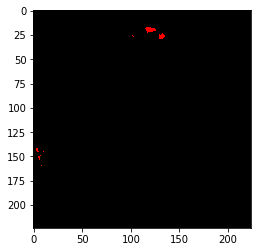

1352


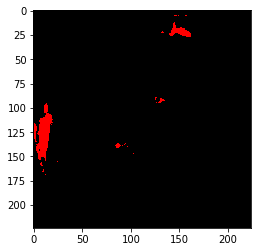

1353


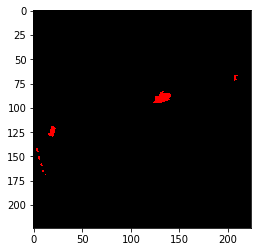

1354


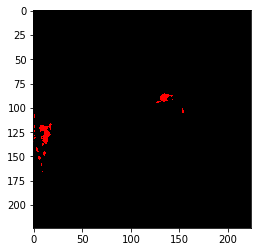

1355


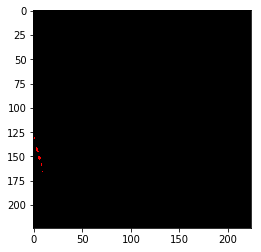

1356


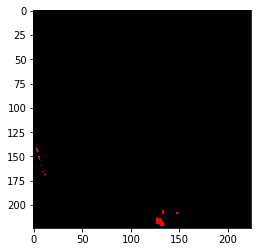

1357


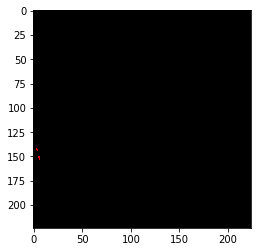

1358


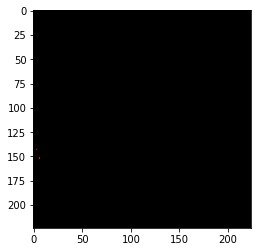

1359


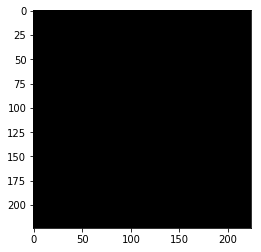

1360


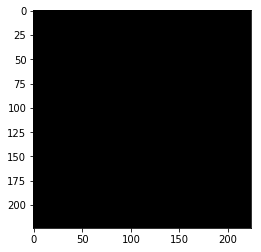

1361


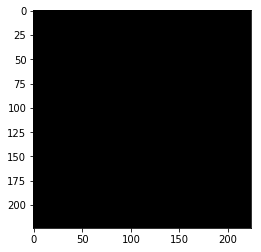

1362


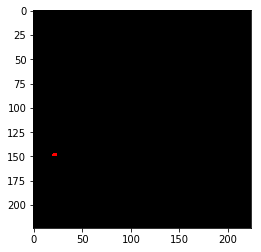

1363


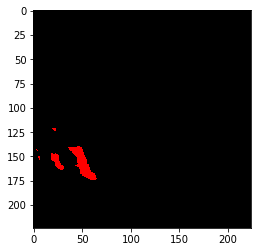

1364


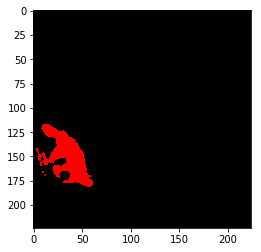

1365


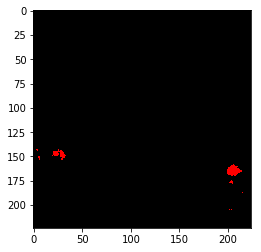

1366


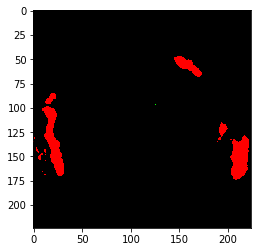

1367


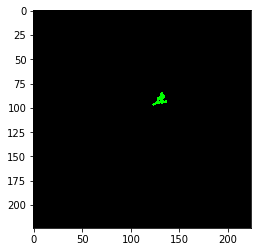

1368


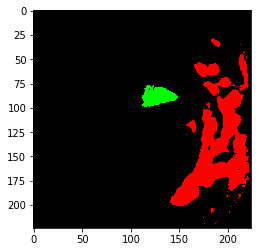

1369


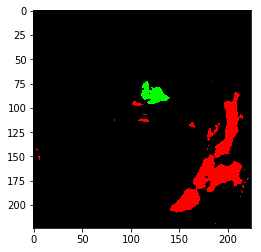

1370


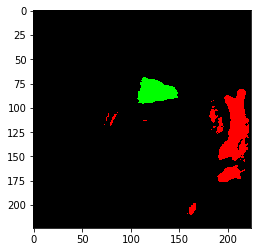

1371


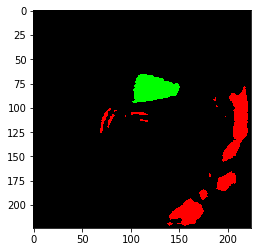

1372


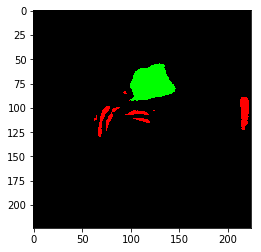

1373


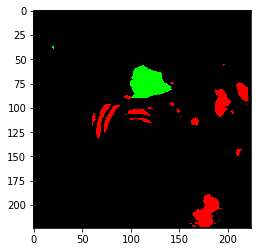

1374


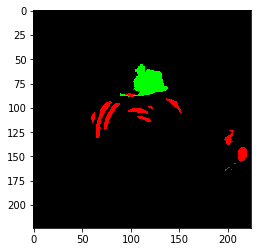

1375


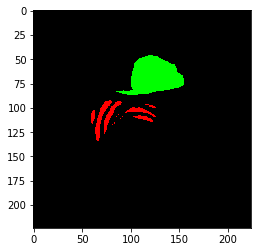

1376


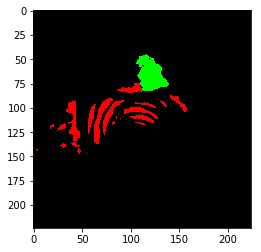

1377


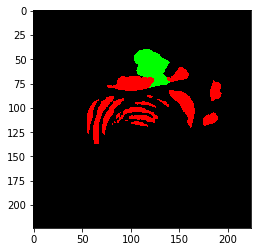

1378


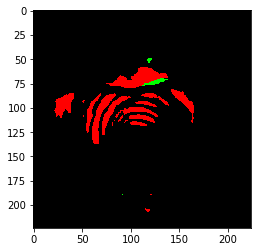

1379


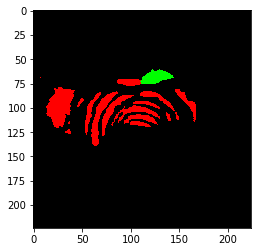

1380


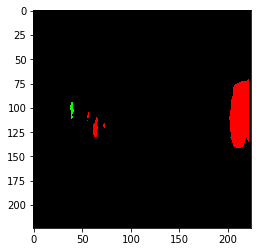

1381


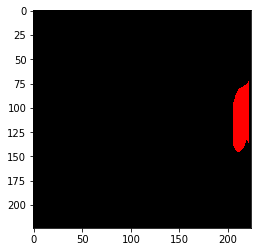

1382


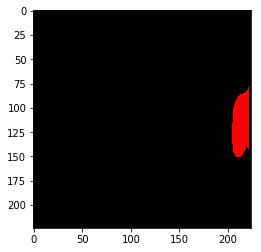

1383


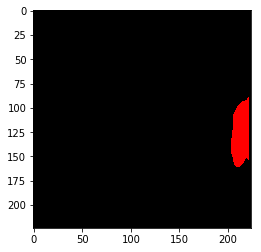

1384


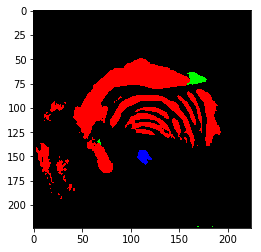

1385


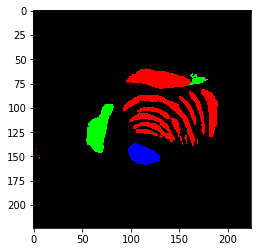

1386


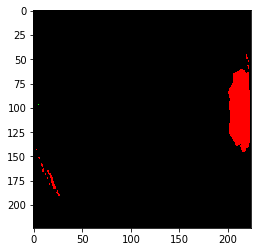

1387


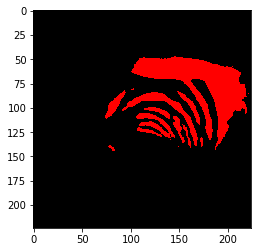

1388


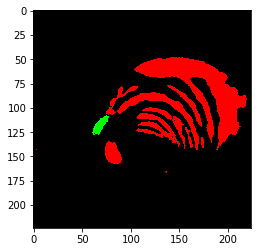

1389


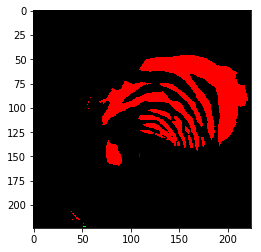

1390


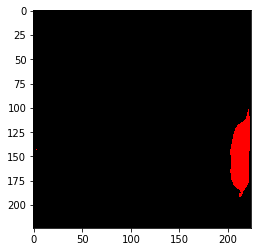

1391


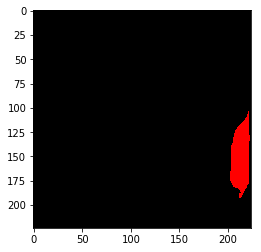

1392


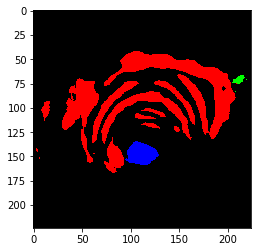

1393


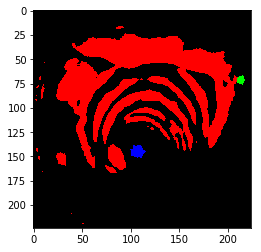

1394


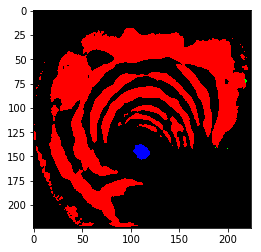

1395


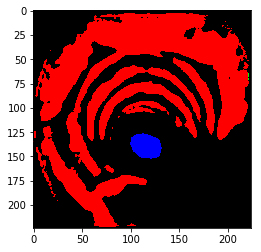

1396


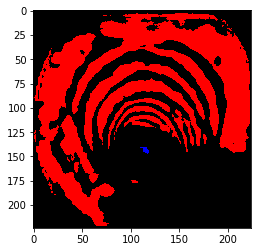

1397


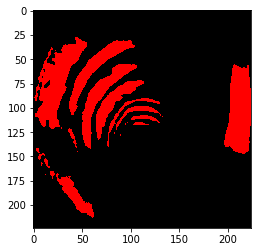

1398


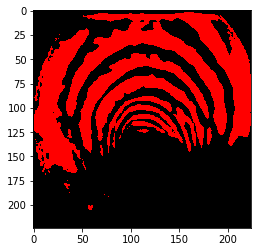

1399


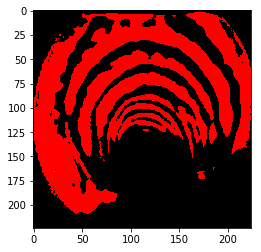

1400


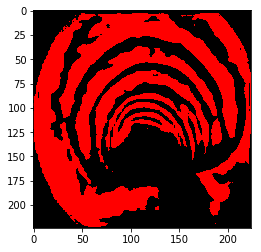

1401


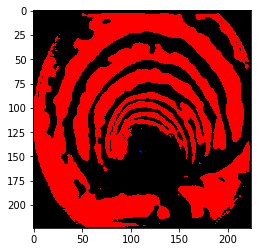

1402


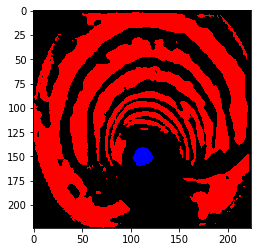

1403


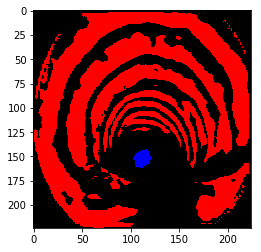

1404


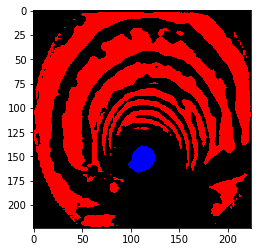

1405


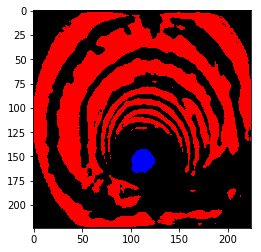

1406


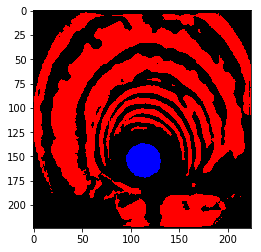

1407


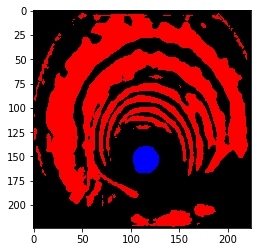

1408


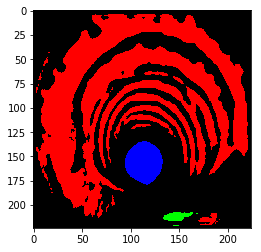

1409


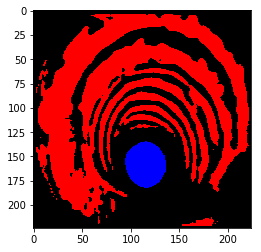

1410


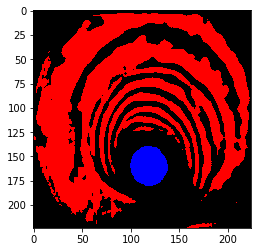

1411


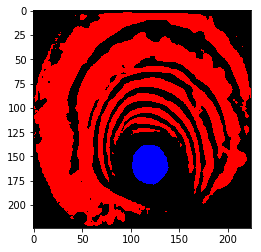

1412


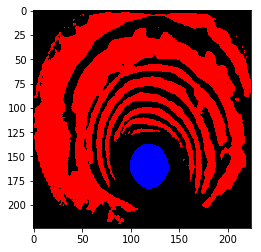

1413


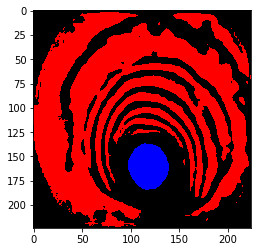

1414


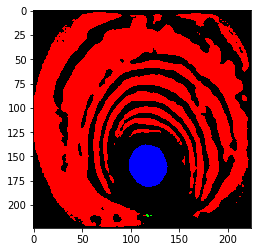

1415


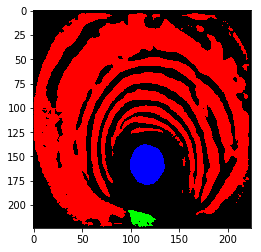

1416


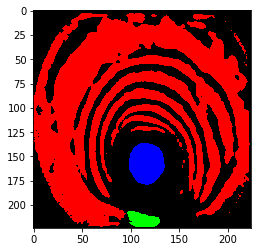

1417


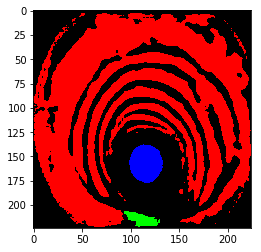

1418


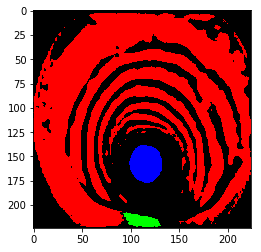

1419


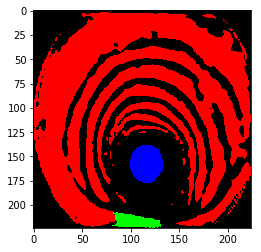

1420


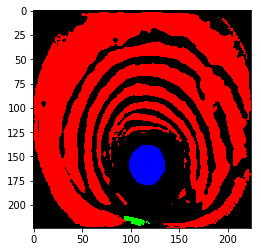

1421


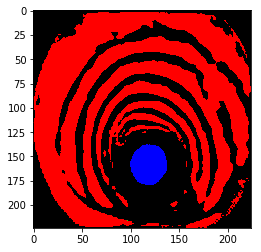

1422


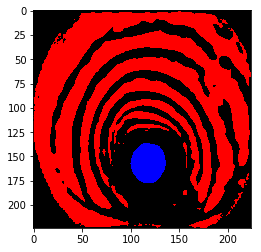

1423


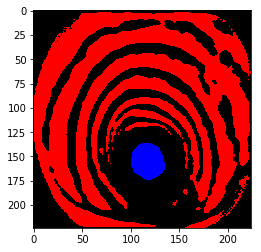

1424


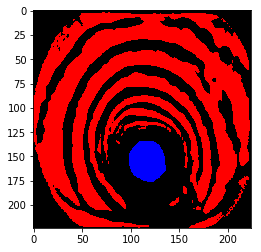

1425


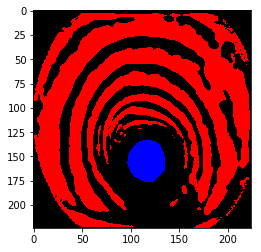

1426


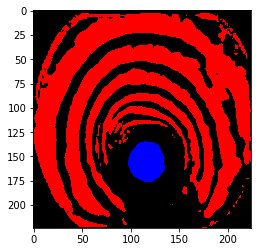

1427


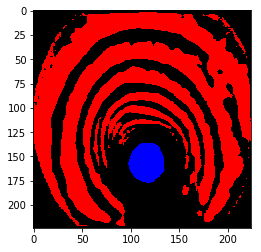

1428


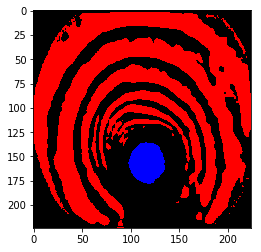

1429


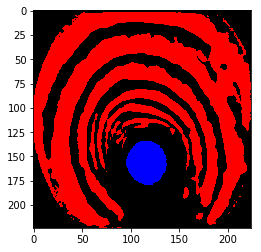

1430


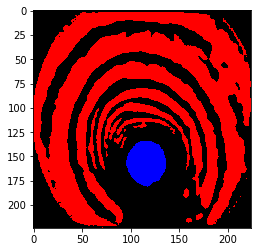

1431


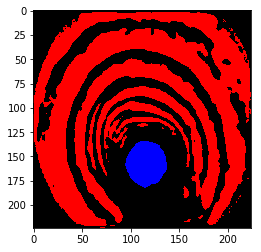

1432


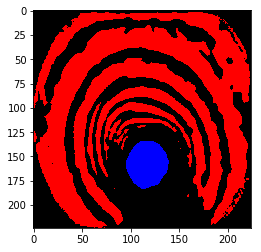

1433


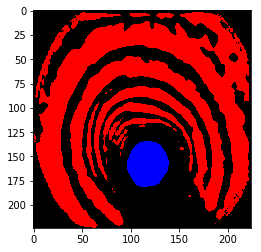

1434


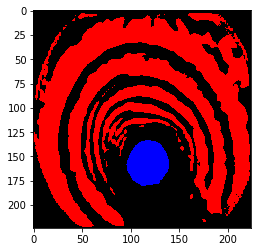

1435


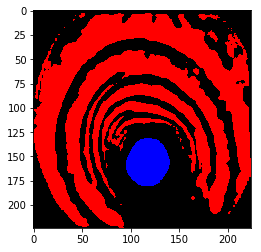

1436


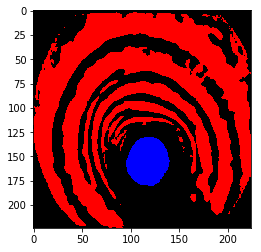

1437


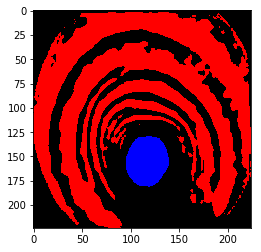

1438


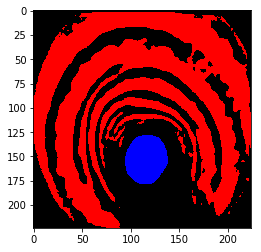

1439


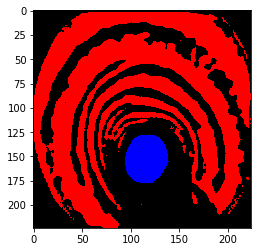

1440


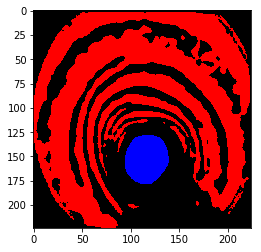

1441


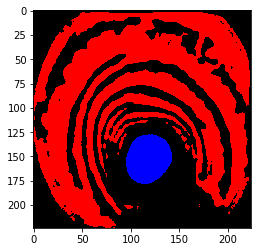

1442


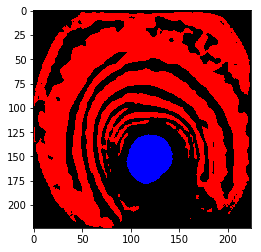

1443


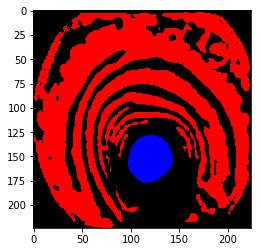

1444


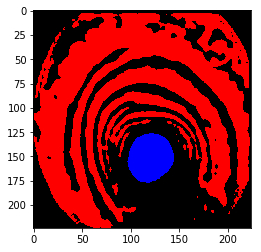

1445


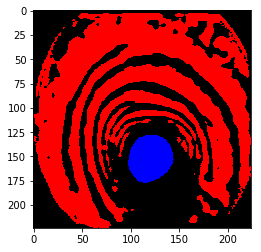

1446


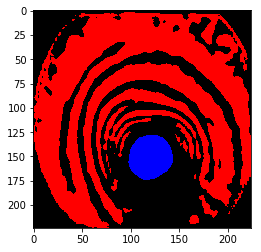

1447


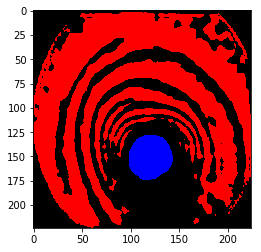

1448


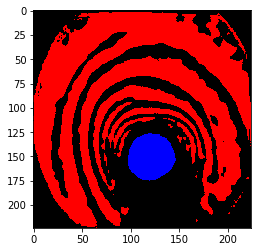

1449


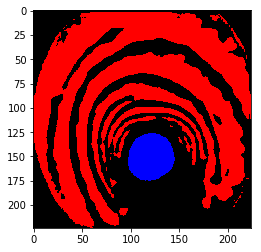

1450


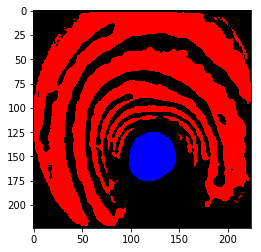

1451


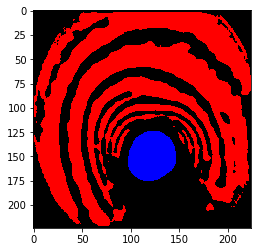

1452


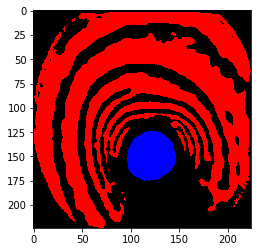

1453


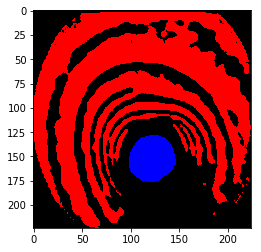

1454


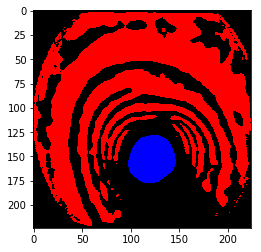

1455


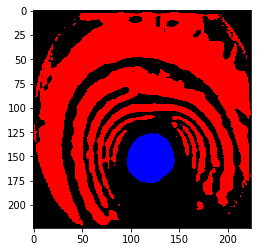

1456


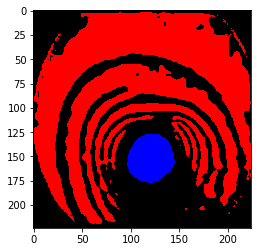

1457


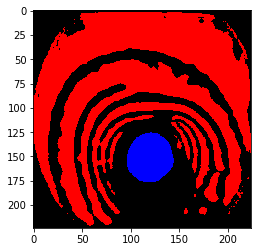

1458


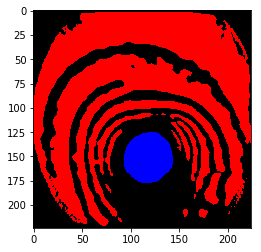

1459


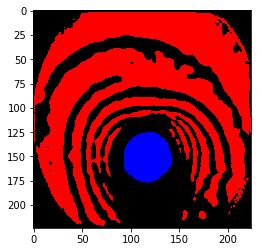

1460


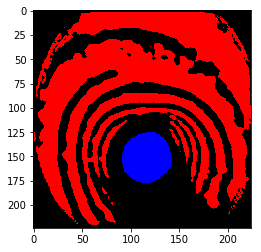

1461


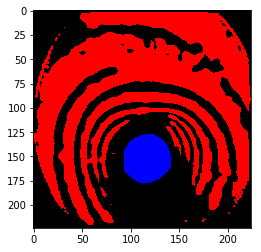

1462


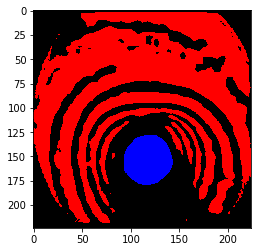

1463


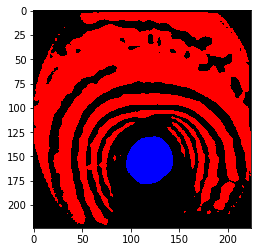

1464


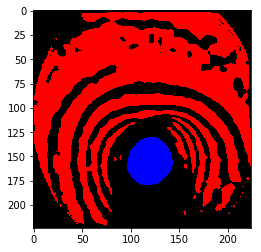

1465


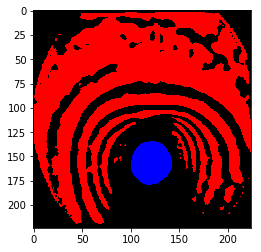

1466


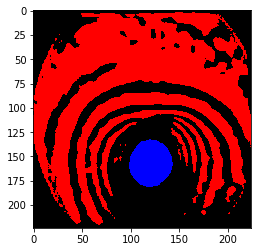

1467


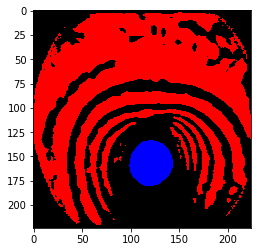

1468


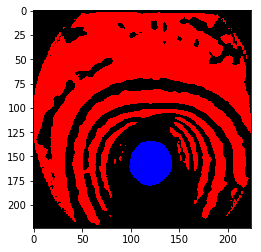

1469


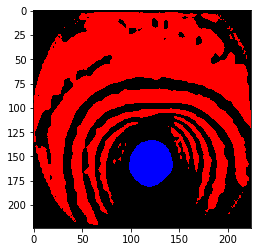

1470


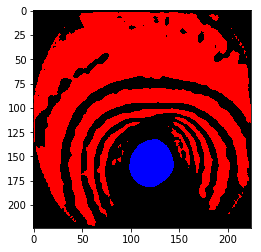

1471


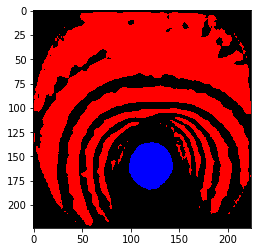

1472


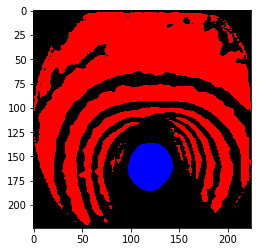

1473


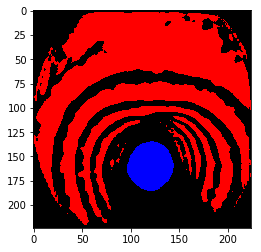

1474


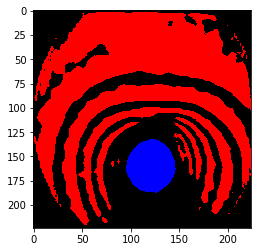

1475


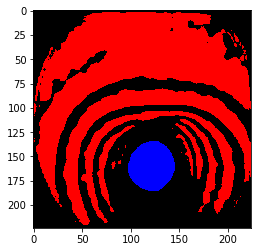

1476


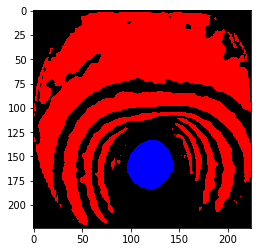

1477


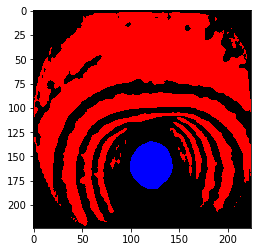

1478


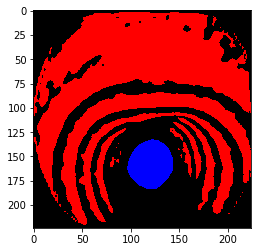

1479


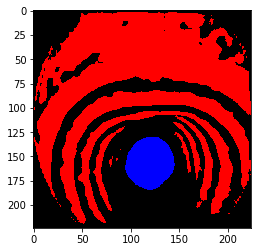

1480


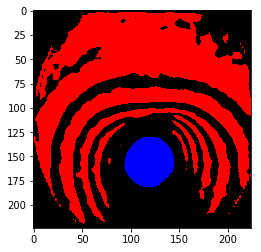

1481


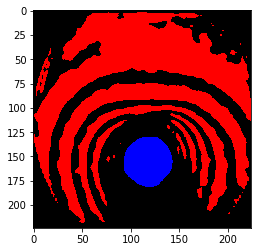

1482


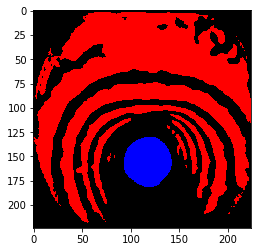

1483


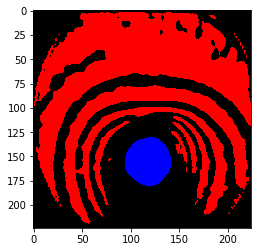

1484


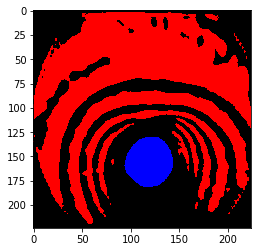

1485


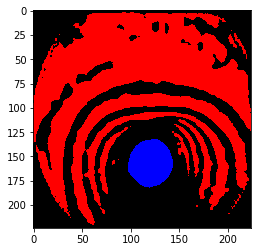

1486


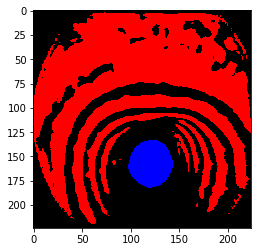

1487


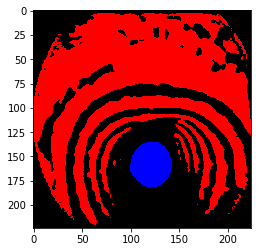

1488


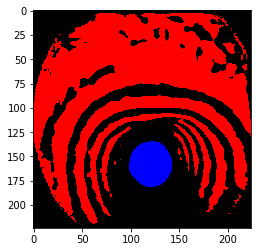

1489


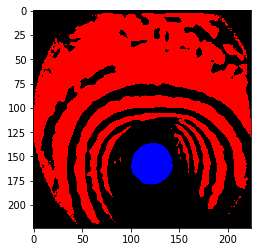

1490


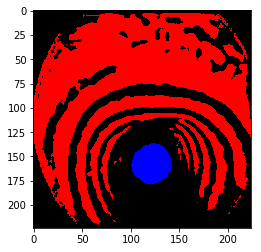

1491


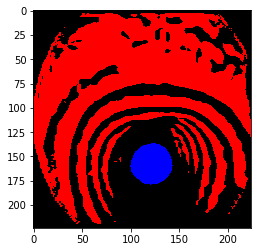

1492


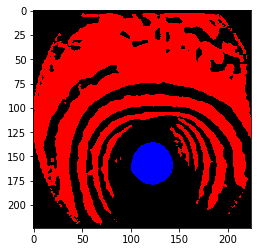

1493


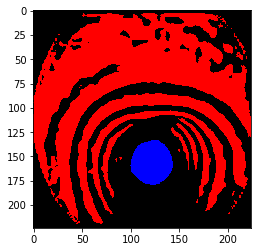

1494


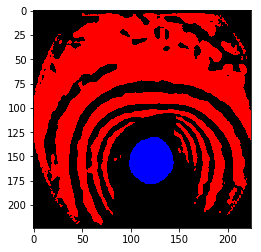

1495


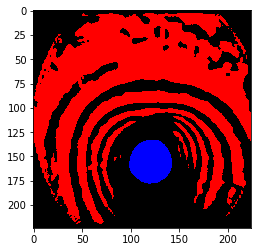

1496


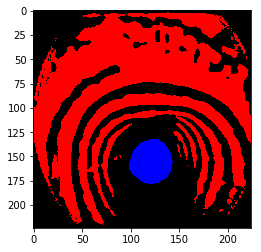

1497


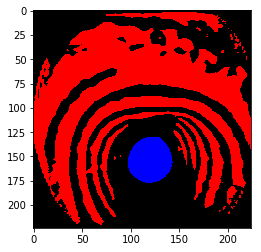

1498


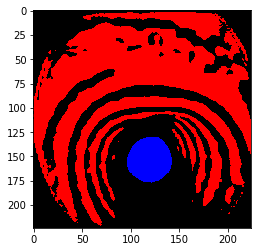

1499


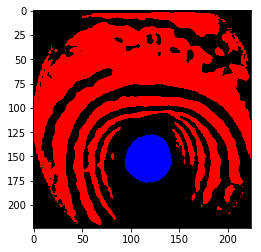

1500


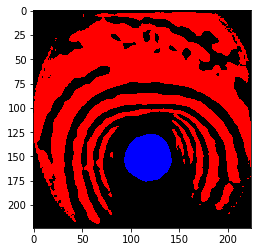

1501


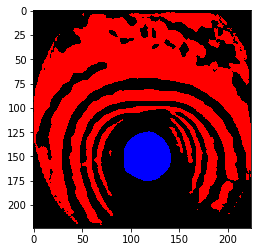

1502


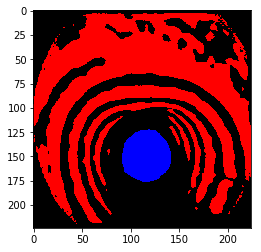

1503


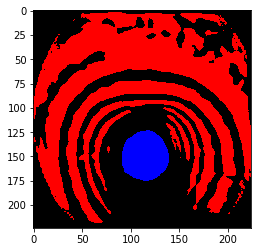

1504


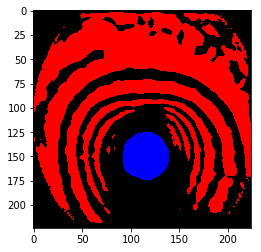

1505


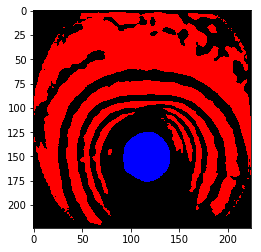

1506


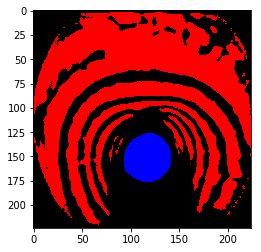

1507


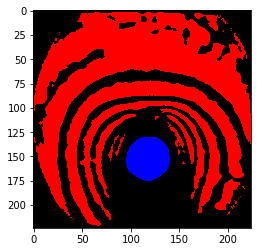

1508


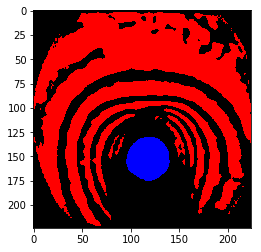

1509


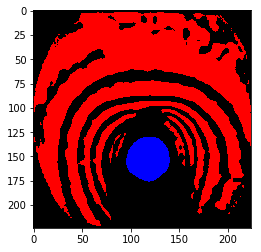

1510


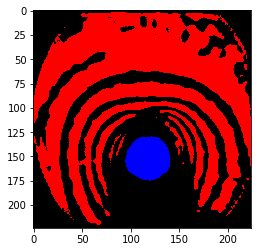

1511


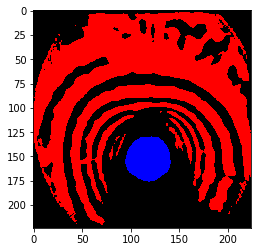

1512


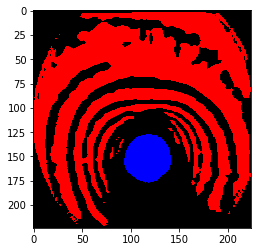

1513


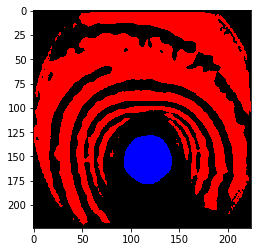

1514


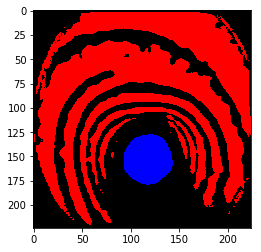

1515


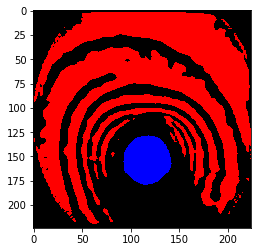

1516


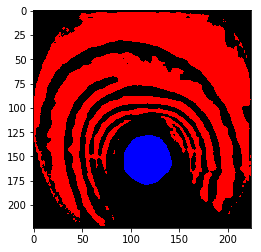

1517


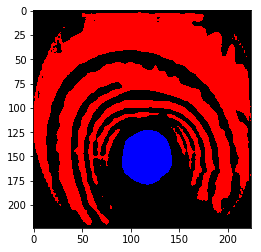

1518


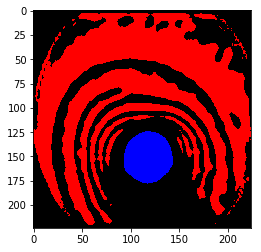

1519


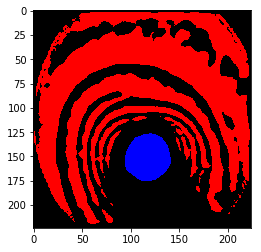

1520


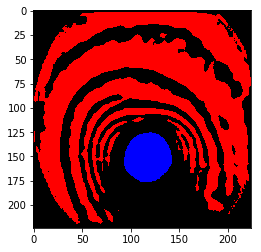

1521


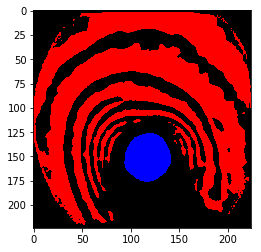

1522


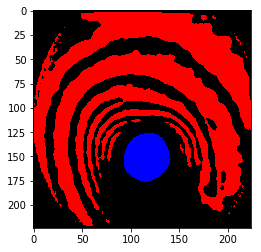

1523


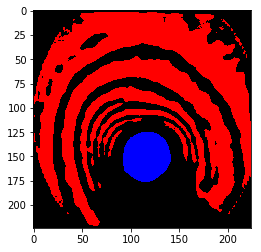

1524


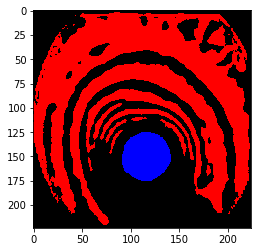

1525


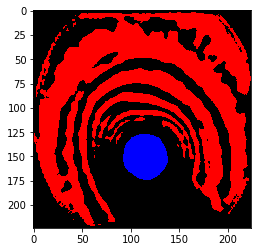

1526


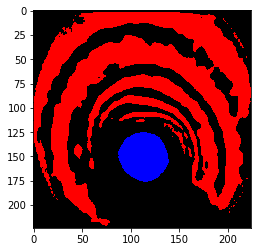

1527


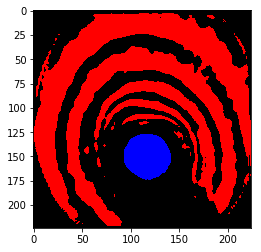

1528


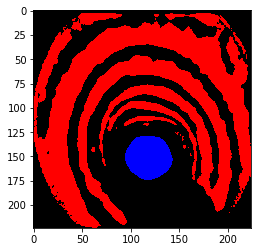

1529


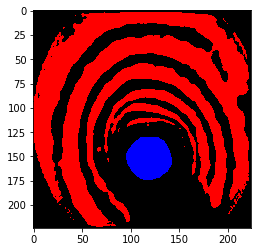

1530


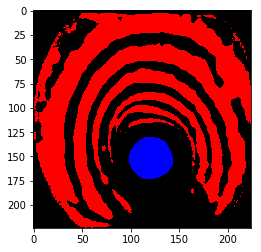

1531


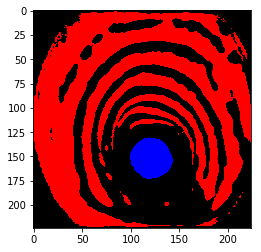

1532


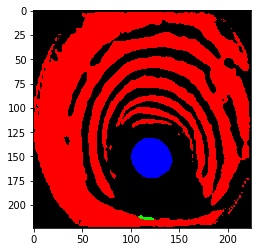

1533


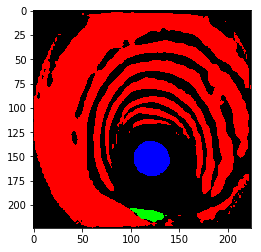

1534


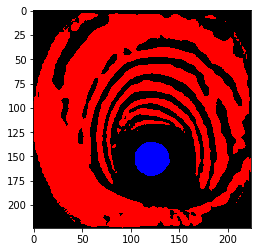

1535


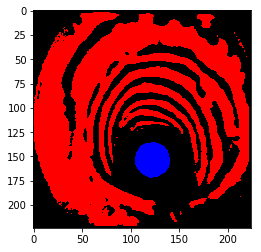

1536


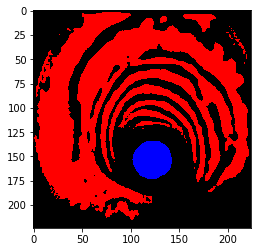

1537


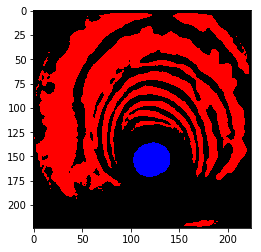

1538


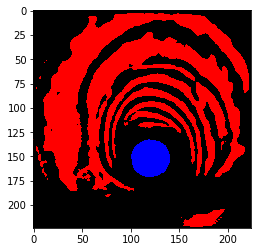

1539


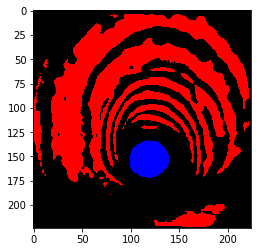

1540


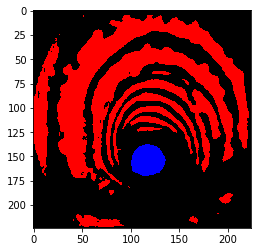

1541


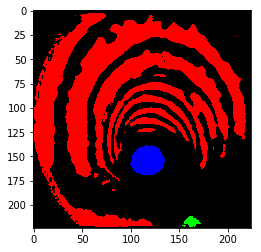

1542


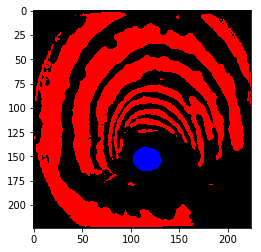

1543


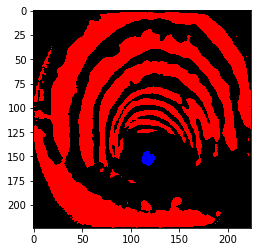

1544


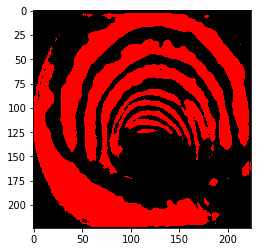

1545


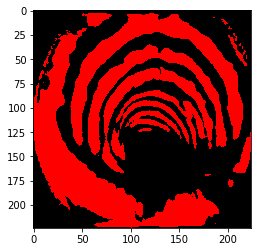

1546


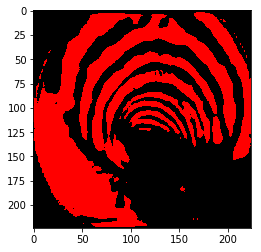

1547


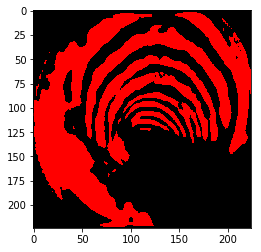

1548


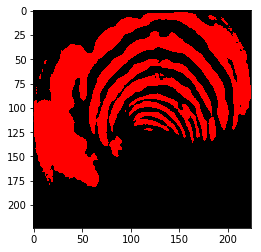

1549


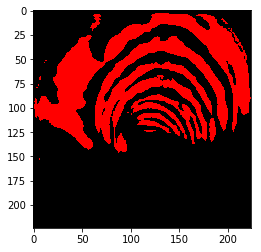

1550


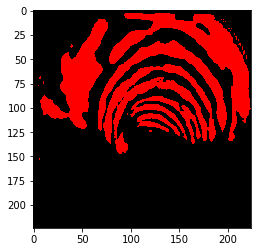

1551


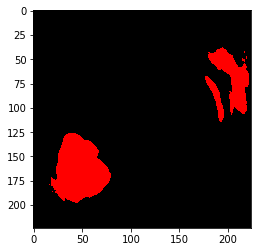

1552


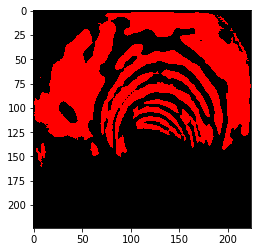

1553


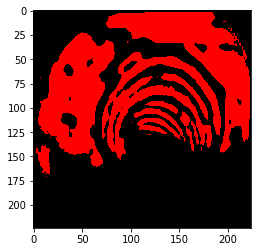

1554


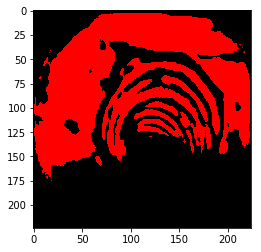

1555


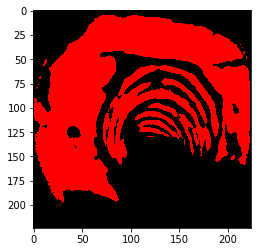

1556


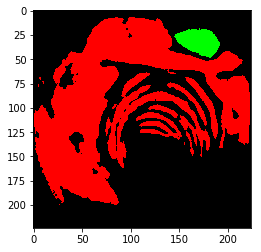

1557


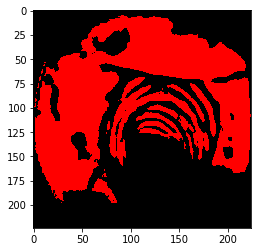

1558


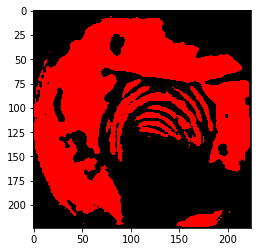

1559


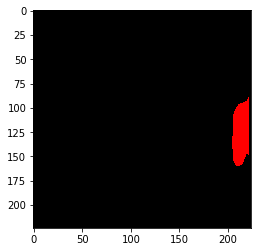

1560


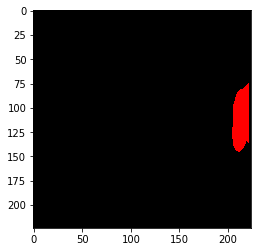

1561


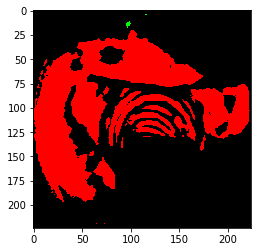

1562


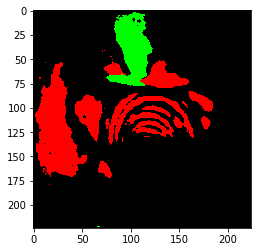

1563


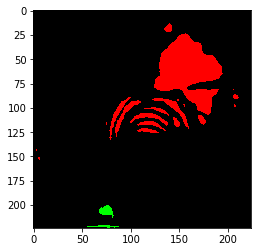

1564


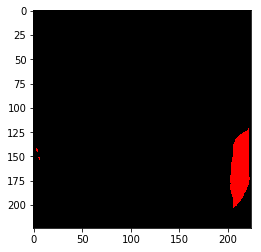

1565


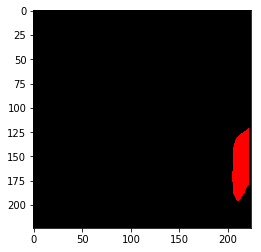

1566


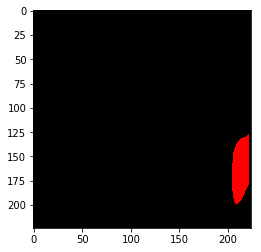

1567


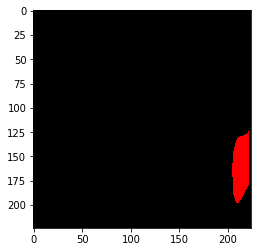

1568


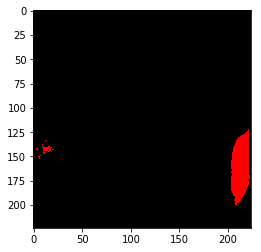

1569


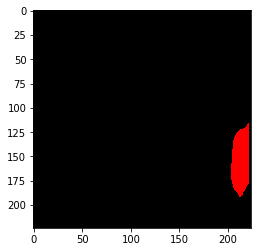

1570


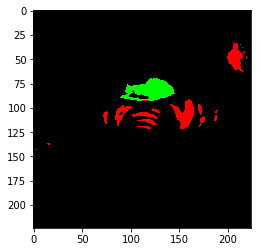

1571


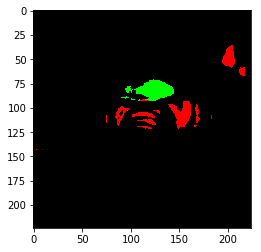

1572


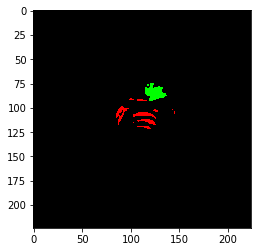

1573


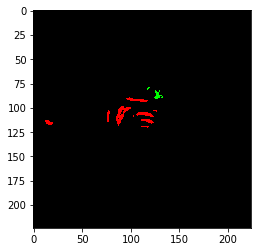

1574


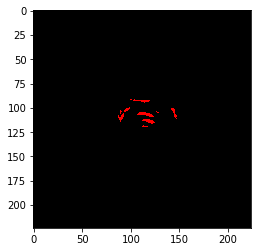

1575


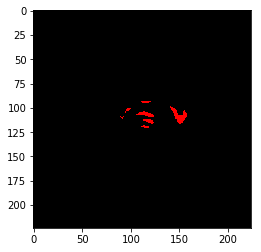

1576


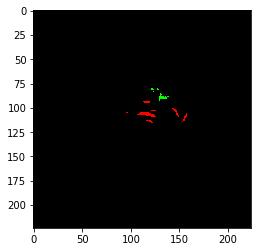

1577


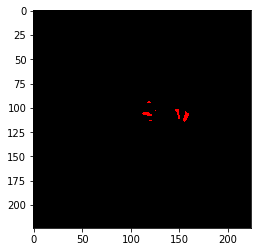

1578


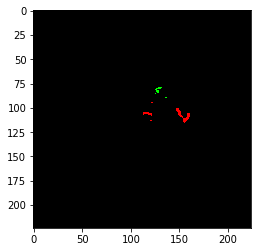

1579


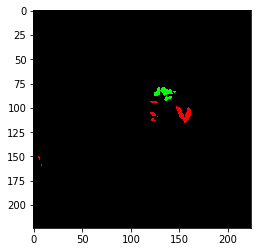

1580


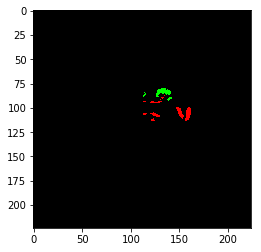

1581


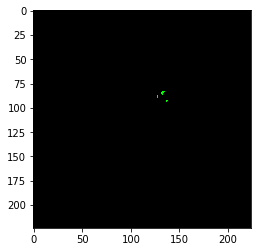

1582


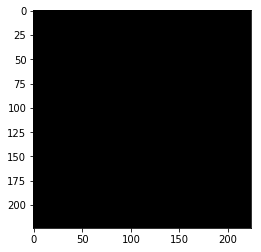

1583


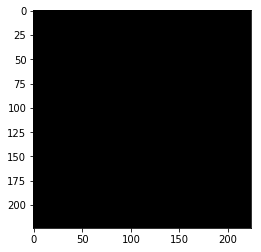

1584


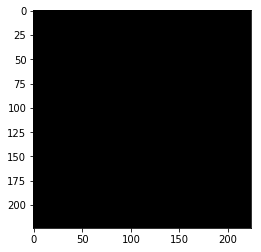

1585


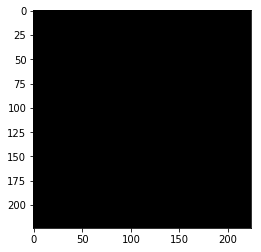

1586


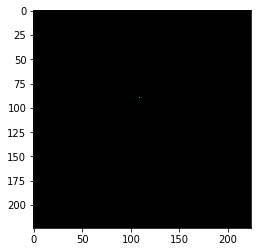

1587


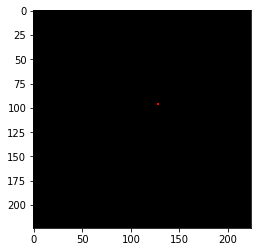

1588


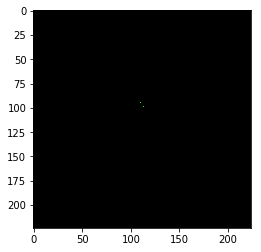

1589


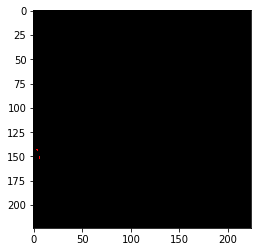

1590


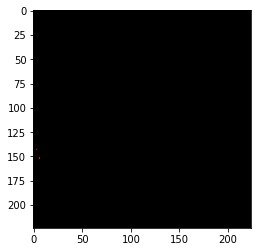

1591


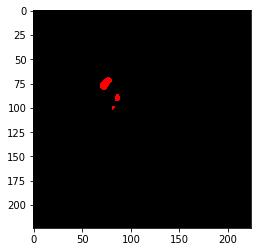

1592


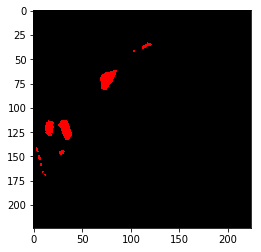

1593


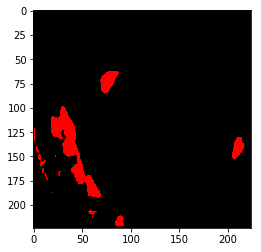

1594


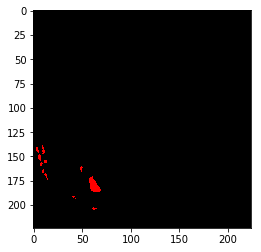

1595


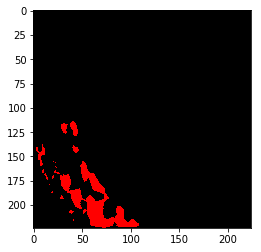

1596


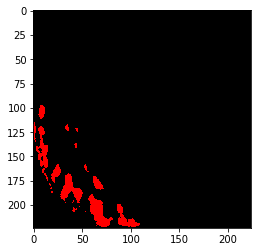

1597


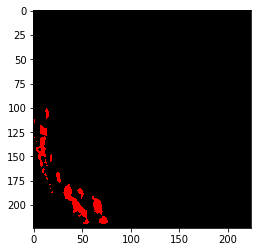

1598


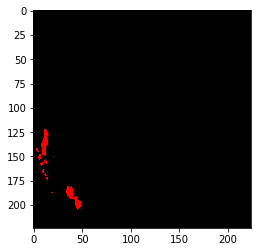

1599


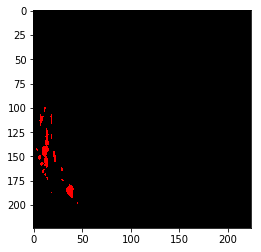

1600


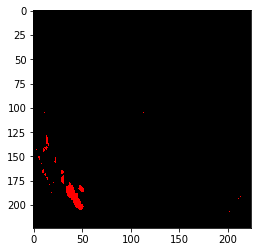

1601


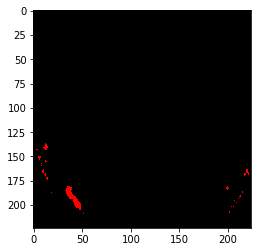

1602


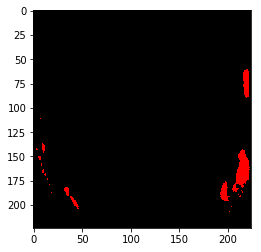

1603


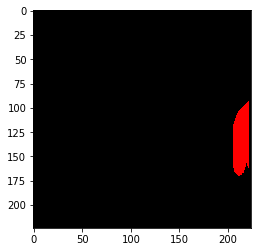

1604


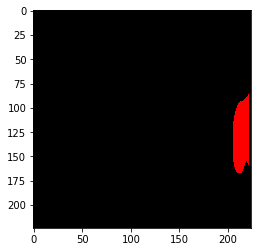

1605


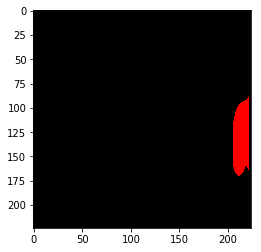

1606


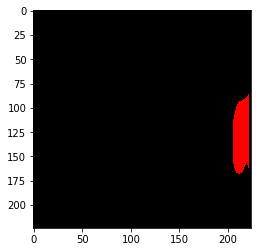

1607


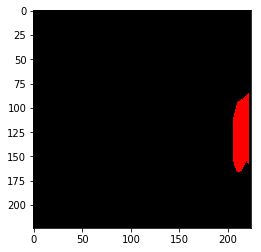

1608


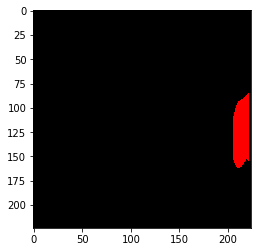

1609


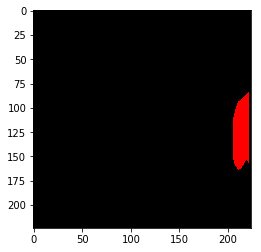

1610


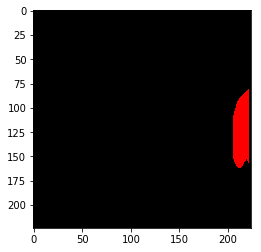

1611


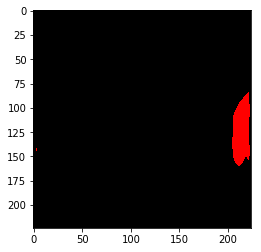

1612


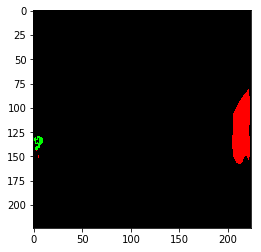

1613


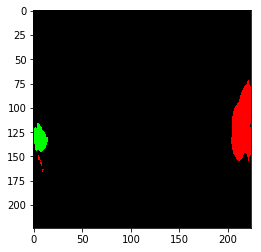

1614


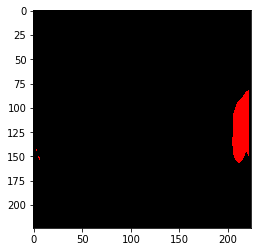

1615


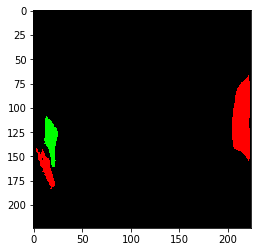

1616


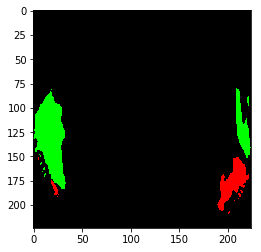

1617


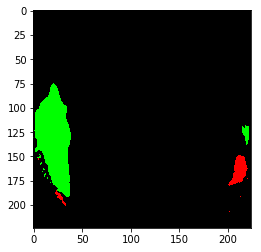

1618


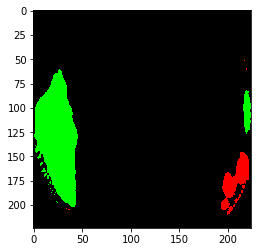

1619


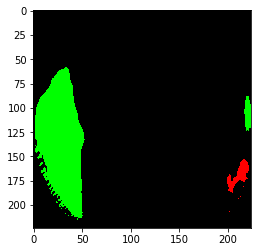

1620


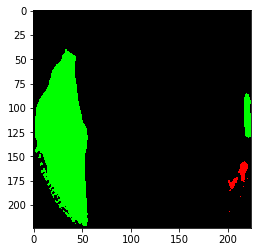

End!


In [9]:
#Advance to starting frame
for i in range(0,start_time_s*fps):
    ret, frame = cap.read()
    ctr+=1
    
clear_output()
print ("Starting!")
while(cap.isOpened() and ctr <end_time_s*fps):

    ctr+=1
    print(ctr)
    
    ret, frame = cap.read() #frame is uint8
    if np.shape(frame) == (): #i.e. empty frame
        break

            
    #Convert from OpenCV image to pytorch tensor, to Image
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) #frame_rgb is uint8
    
    t = PIL.Image.fromarray(frame_rgb)
    t = pil2tensor(t.convert("RGB"), np.float32).div_(255)
    t = Image(t)
    
    #Predict
    prediction = learn.predict(t)
    p = prediction[1] #prediction data
    p1 = np.array(p)
    p1.astype('uint8')

    p3 = p1
    p3 = p3.squeeze()
    
    p4 = np.expand_dims(p3, axis=2)
    p4 = p4.astype('uint8')
    
    mask = np.copy(p4)
    mask=mask.squeeze()

    mask_d = mask_to_colour(mask)
    mask_d = img_as_float(mask_d)
    
    mask_timeline.append(mask)
    plt.imshow(mask_d)
    plt.show()
    
#     cr=crop_img(frame,224,224) #cr is float64
    
#     #Save the overlaid frame
#     ov=overlay_mask(cr, mask_d)
    
#     # Write uint8 version of ov to output video
#     out.write(img_as_ubyte(ov))
    
cap.release()
out.release()
print ("End!")

In [10]:
cv2.cvtColor(mask,cv2.COLOR_GRAY2BGR).shape

(224, 224, 3)

<function matplotlib.pyplot.show(*args, **kw)>

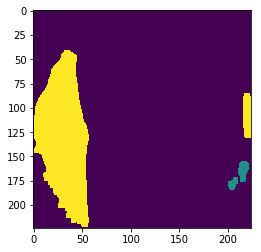

In [11]:

mask_c = cv2.cvtColor(mask,cv2.COLOR_GRAY2BGR)
plt.imshow(cv2.cvtColor(mask,cv2.COLOR_GRAY2BGR))
# plt.imshow(mask_c*100.0)

mask_dilate = np.zeros_like(mask)
mask_dilate = cv2.erode(mask,np.ones((3,3)))
mask_dilate = cv2.dilate(mask_dilate,np.ones((5,5)))
plt.imshow(mask_dilate)
plt.show

# labels = get_blobs(mask_c,imshow=True)
# one_ring = np.array(labels[1]==10)
# plt.imshow(one_ring)
# ndimage.measurements.center_of_mass(one_ring)

In [12]:
def plot_many(images):
    plt.figure(figsize=(9, 3.5))

    
    for i in range(1,len(images)):
#             plt.axis('off')
        plt.subplot(130+i)
        plt.imshow(images[i], cmap='nipy_spectral')
        plt.title(str(i))

#         plt.axis('off')
    plt.tight_layout()
    plt.show()


[0 1 3]
(224, 224, 3)
stuff in [2] [0 1]


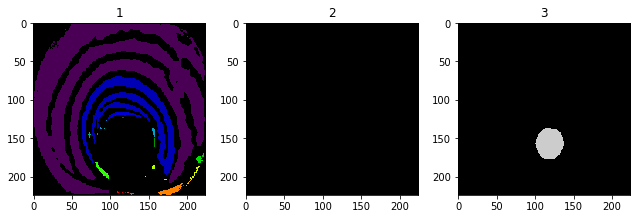

In [168]:
img = cv2.cvtColor(mask_timeline[71],cv2.COLOR_GRAY2BGR)
print(np.unique(img))
labels = get_blobs(img,imshow=True)

[0 1]
[[0 0 0 0 ... 0 0 0 0]
 [0 0 0 0 ... 0 0 0 0]
 [0 0 0 0 ... 0 0 0 0]
 [0 0 0 0 ... 0 0 0 0]
 ...
 [0 0 0 0 ... 0 0 0 0]
 [0 0 0 0 ... 0 0 0 0]
 [0 0 0 0 ... 0 0 0 0]
 [0 0 0 0 ... 0 0 0 0]]
(118, 156)


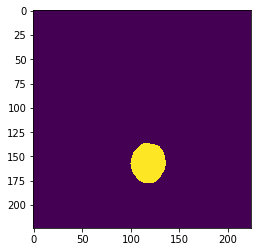

In [179]:
plt.imshow(labels[3])

thresh = labels[3]
 
print(np.unique(thresh))
thresh = img_as_uint(thresh*100)
print(thresh)
# convert the grayscale image to binary image
# ret,thresh = cv2.threshold(gray_image,127,255,0)
 
# calculate moments of binary image
M = cv2.moments(thresh)
 
# calculate x,y coordinate of center
cX = int(M["m10"] / M["m00"])
cY = int(M["m01"] / M["m00"])

print((cX,cY))

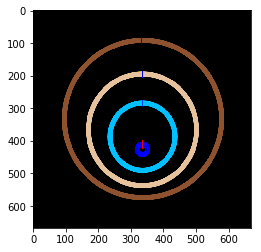

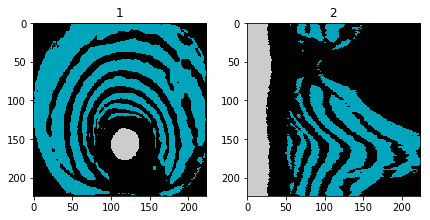

In [180]:
targ = cv2.imread("/storage/vocal_cords_and_rings_data/data/target3.PNG")
plt.imshow(targ)

############################
# img = targ
img = mask_timeline[71]
img = img.astype(np.float32)
# img = cv2.resize(img,(240,190))

#img.shape[0]/2, img.shape[1]/2
#360,350


value = np.sqrt(((img.shape[0]/2.0)**2.0)+((img.shape[1]/2.0)**2.0))
polar_image = cv2.linearPolar(img,(cX,cY), value, cv2.WARP_FILL_OUTLIERS)
polar_image = polar_image.astype(np.uint8)

# plot_many([_,mask_timeline[71],polar_image])
plot_many([_,img,polar_image])

[0 1 3]


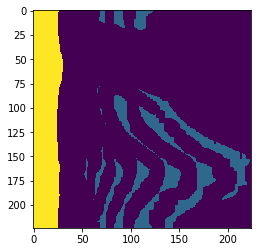

In [187]:
e = cv2.erode(polar_image,np.ones((11,1)))
e = cv2.erode(e,np.ones((2,2)))

plt.imshow(e)
print(np.unique(e))

[0 1 3]


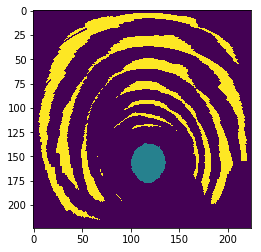

In [191]:
linear_image = cv2.linearPolar(e,(cX,cY), value, cv2.WARP_INVERSE_MAP+cv2.WARP_FILL_OUTLIERS)
plt.imshow(linear_image*100)
print(np.unique(linear_image))

[0 1 3]
(224, 224, 3)
stuff in [2] [0 1]


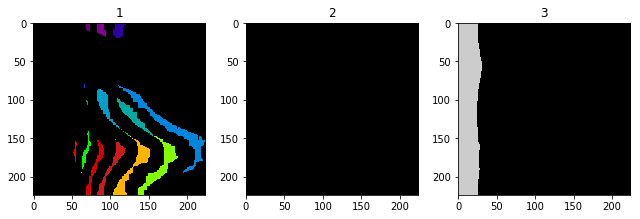

In [190]:
img = cv2.cvtColor(e,cv2.COLOR_GRAY2BGR)
print(np.unique(img))
labels = get_blobs(img,imshow=True)

In [118]:
# print(cv2.cvtColor(labels[1],cv2.COLOR_GRAY2BGR).shape)
from imutils import perspective
from imutils import contours
import imutils

# edged = cv2.Canny(img*100, 50, 100)
# edged = cv2.dilate(edged, None, iterations=1)
# edged = cv2.erode(edged, None, iterations=1)

cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
 
# sort the contours from left-to-right and initialize the
# 'pixels per metric' calibration variable
(cnts, _) = contours.sort_contours(cnts)


5


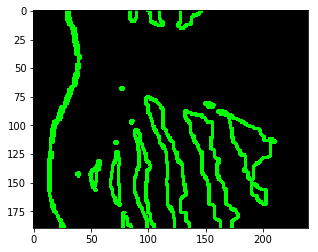

In [119]:
large_cnts=[]
for c in cnts:
    if cv2.contourArea(c) > 30:
        large_cnts.append(c)
print(len(large_cnts))
orig = np.zeros_like(img)
cv2.drawContours(orig, [l for l in cnts], -1, (0, 255, 0), 2)
plt.imshow(orig)
# plot_many([cv2.drawContours(orig, l, -1, (0, 255, 0), 2) for l in cnts][:2])